Predicting Salary of Adults with ML
Problem

. Predict whether a person makes over 50K a year.

. Dataset Source:- https://archive.ics.uci.edu/ml/machine-learning-databases/adult/

In [1]:
#Loading EDA packages
import pandas as pd
import numpy as np

In [2]:
#loading ML packagses

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, e

In [3]:
column_names= ["Age", "workclass", "A", "education", "education-num", "marital status", "occupation", "relation", "race", "sex", "captial-gain", "captial-loss", "hours-per-week", "native-country", "class"]

In [4]:
df= pd.read_csv("adult.data", names= column_names)
df.head()

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [5]:
df.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [6]:
df.shape

(32561, 15)

In [7]:
df.dtypes

Age                int64
workclass         object
A                  int64
education         object
education-num      int64
marital status    object
occupation        object
relation          object
race              object
sex               object
captial-gain       int64
captial-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object

In [8]:
df.dtypes[df.dtypes== 'object']

workclass         object
education         object
marital status    object
occupation        object
relation          object
race              object
sex               object
native-country    object
class             object
dtype: object

In [9]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [10]:
d= {v: k for k,v in enumerate(set(df['workclass'].unique()))}

In [11]:
d

{' Federal-gov': 0,
 ' Self-emp-inc': 1,
 ' Self-emp-not-inc': 2,
 ' Without-pay': 3,
 ' Private': 4,
 ' Never-worked': 5,
 ' State-gov': 6,
 ' ?': 7,
 ' Local-gov': 8}

In [12]:
#to assign number to unique values

def generate_dict(data):
    my_dict= {v: k for k,v in enumerate(set(data))}
    return my_dict

In [13]:
generate_dict(df['education'].unique())

{' Assoc-acdm': 0,
 ' Doctorate': 1,
 ' HS-grad': 2,
 ' Prof-school': 3,
 ' 12th': 4,
 ' Masters': 5,
 ' Bachelors': 6,
 ' 11th': 7,
 ' 1st-4th': 8,
 ' 7th-8th': 9,
 ' Some-college': 10,
 ' 5th-6th': 11,
 ' Preschool': 12,
 ' 10th': 13,
 ' Assoc-voc': 14,
 ' 9th': 15}

In [14]:
obj_list= ["workclass", "education", "marital status", "occupation", "relation", "race", "sex", "native-country", "class"]
obj_names=  ["d_workclass", "d_education", "d_marital_status", "d_occupation", "d_relation", "d_race", "d_sex", "d_native_country", "d_class"]
for i,j in zip(obj_names, obj_list):
    print(f'{i}= generate_dict(df["{j}"].unique())')

d_workclass= generate_dict(df["workclass"].unique())
d_education= generate_dict(df["education"].unique())
d_marital_status= generate_dict(df["marital status"].unique())
d_occupation= generate_dict(df["occupation"].unique())
d_relation= generate_dict(df["relation"].unique())
d_race= generate_dict(df["race"].unique())
d_sex= generate_dict(df["sex"].unique())
d_native_country= generate_dict(df["native-country"].unique())
d_class= generate_dict(df["class"].unique())


In [15]:
d_workclass= generate_dict(df["workclass"].unique())
d_education= generate_dict(df["education"].unique())
d_marital_status= generate_dict(df["marital status"].unique())
d_occupation= generate_dict(df["occupation"].unique())
d_relation= generate_dict(df["relation"].unique())
d_race= generate_dict(df["race"].unique())
d_sex= generate_dict(df["sex"].unique())
d_native_country= generate_dict(df["native-country"].unique())
d_class= generate_dict(df["class"].unique())

In [16]:
d_sex

{' Female': 0, ' Male': 1}

In [17]:
df2= df

## Mapping Dataset

In [18]:
df2["workclass"]= df2["workclass"].map(d_workclass)
df2["education"]= df2["education"].map(d_education)
df2["marital status"]= df2["marital status"].map(d_marital_status)
df2["occupation"]= df2["occupation"].map(d_occupation)
df2["relation"]= df2["relation"].map(d_relation)
df2["race"]= df2["race"].map(d_race)
df2["sex"]= df2["sex"].map(d_sex)
df2["native-country"]= df2["native-country"].map(d_native_country)
df2["class"]= df2["class"].map(d_class)


In [19]:
df2.head(10)

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,6,77516,6,13,5,4,4,2,1,2174,0,40,23,1
1,50,2,83311,6,13,2,9,2,2,1,0,0,13,23,1
2,38,4,215646,2,9,3,2,4,2,1,0,0,40,23,1
3,53,4,234721,7,7,2,2,2,0,1,0,0,40,23,1
4,28,4,338409,6,13,2,14,3,0,0,0,0,40,27,1
5,37,4,284582,5,14,2,9,3,2,0,0,0,40,23,1
6,49,4,160187,15,5,0,10,4,0,0,0,0,16,38,1
7,52,2,209642,2,9,2,9,2,2,1,0,0,45,23,0
8,31,4,45781,5,14,5,14,4,2,0,14084,0,50,23,0
9,42,4,159449,6,13,2,9,2,2,1,5178,0,40,23,0


In [20]:
df2.to_csv("Adult_Salary_Dataset_2.csv")

In [21]:
df2.dtypes

Age               int64
workclass         int64
A                 int64
education         int64
education-num     int64
marital status    int64
occupation        int64
relation          int64
race              int64
sex               int64
captial-gain      int64
captial-loss      int64
hours-per-week    int64
native-country    int64
class             int64
dtype: object

In [22]:
## Data Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Correlation Plot

In [23]:
corr_mat= df2.corr()

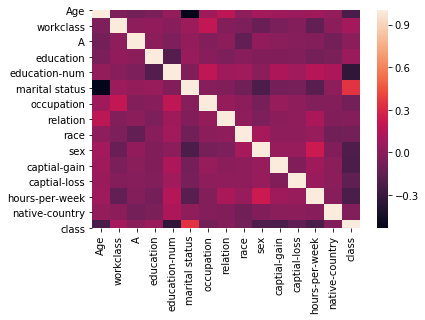

In [24]:
sns.heatmap(corr_mat)


<Figure size 720x1440 with 0 Axes>

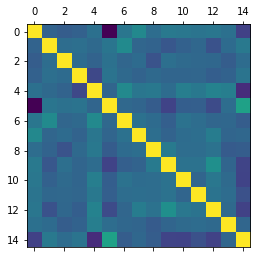

In [25]:
#plotting with matplotlib

plt.figure(figsize= (10,20)) 
plt.matshow(corr_mat)
plt.show()

In [26]:
#value counts

df['class'].value_counts()

1    24720
0     7841
Name: class, dtype: int64

<BarContainer object of 2 artists>

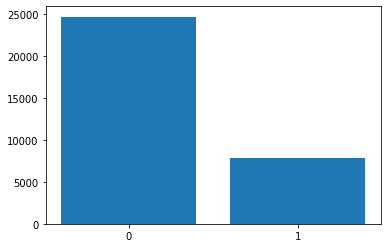

In [27]:
#plotting bar
plt.bar(['0','1'], df['class'].value_counts())

### Machine Learning Aspect

In [28]:
df2.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [29]:
df2.shape

(32561, 15)

In [30]:
df2.iloc[:,0:14].columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country'],
      dtype='object')

In [31]:
df2.iloc[:,14].name

'class'

In [32]:
x = df2.iloc[:,0:14].values
y = df2.iloc[:,14].values

In [33]:
x,y

(array([[    39,      6,  77516, ...,      0,     40,     23],
        [    50,      2,  83311, ...,      0,     13,     23],
        [    38,      4, 215646, ...,      0,     40,     23],
        ...,
        [    58,      4, 151910, ...,      0,     40,     23],
        [    22,      4, 201490, ...,      0,     20,     23],
        [    52,      1, 287927, ...,      0,     40,     23]], dtype=int64),
 array([1, 1, 1, ..., 1, 1, 0], dtype=int64))

### Splitting into Training and Testing set

In [34]:
# Split dataset
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)

In [35]:
import warnings
warnings.filterwarnings('ignore')

In [36]:
print(x_train.shape)
print(y_train.shape)

(21815, 14)
(21815,)


### Logistic Regression

In [37]:
logit = LogisticRegression()
logit.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
# Accuracy of our Model
logit.score(x_test,y_test)

0.8125814256467523

### Saving the Model

In [39]:
from sklearn.externals import joblib

In [40]:
salary_logit_model = open("salary_logit_model.pkl","wb")
joblib.dump(logit,salary_logit_model)

In [41]:
salary_logit_model.close()

### Naive Bayes

In [42]:
nv = MultinomialNB()
nv.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [43]:
nv.score(x_test,y_test)

0.7863391029220175

In [44]:
salary_nv_model = open("salary_nv_model.pkl","wb")
joblib.dump(nv,salary_nv_model)

In [45]:
salary_nv_model.close()

### Random Forest

In [46]:
rf = RandomForestClassifier(n_estimators=100, max_depth=4)
rf.fit(x_train,y_train)
                            

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=4, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [47]:
rf.score(x_test,y_test)

0.8460822631676903

In [48]:
# Save Model
salary_rf_model = open("salary_rf_model.pkl","wb")
joblib.dump(rf,salary_rf_model)

In [49]:
salary_rf_model.close()

### Cross Validation 

In [50]:
cv_scores = cross_val_score(LogisticRegression(),x,y,cv=10)

In [51]:
cv_scores

array([0.81363218, 0.7997543 , 0.79453317, 0.79944717, 0.80436118,
       0.80589681, 0.80251843, 0.80436118, 0.81050369, 0.80620393])

In [52]:
np.mean(cv_scores)

0.8041212029429714

Mean accuracy is 80.1% for Logistic Regression.

In [53]:
cv_scores_2 = cross_val_score(MultinomialNB(),x,y,cv=10)

In [54]:
cv_scores_2

array([0.78231501, 0.78194103, 0.77886978, 0.77948403, 0.78101966,
       0.79084767, 0.77364865, 0.78163391, 0.78409091, 0.79207617])

In [55]:
np.mean(cv_scores_2)

0.782592680742819

Mean accuracy is 78.2% for Multinomial Naive Bayes Classifier.

In [56]:
cv_scores_3 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=2),x,y,cv=10)

In [57]:
cv_scores_3

array([0.7930611 , 0.80067568, 0.79299754, 0.80128993, 0.79576167,
       0.79883292, 0.79760442, 0.79207617, 0.79054054, 0.79944717])

In [58]:
np.mean(cv_scores_3)

0.796228714339706

Mean accuracy is 79.9% for Random Forest Classifier.

In [59]:
##changing paramerters

In [60]:
cv_scores_4 = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=4),x,y,cv=10)

In [61]:
cv_scores_4

array([0.83942278, 0.84428747, 0.84889435, 0.83968059, 0.84090909,
       0.84735872, 0.83415233, 0.84920147, 0.85227273, 0.83507371])

In [62]:
np.mean(cv_scores_4)

0.843125324853142

Mean accuracy is 84.5% for Random Forest Classifier with max depth 4

## Model Interpretation 

In [63]:
import eli5

In [64]:
# Showing the Weight for our model
eli5.show_weights(logit, top=10)

In [65]:
df.head()

,Age,workclass,A,education,education-num,marital status,occupation,relation,race,sex,captial-gain,captial-loss,hours-per-week,native-country,class
0,39,6,77516,6,13,5,4,4,2,1,2174,0,40,23,1
1,50,2,83311,6,13,2,9,2,2,1,0,0,13,23,1
2,38,4,215646,2,9,3,2,4,2,1,0,0,40,23,1
3,53,4,234721,7,7,2,2,2,0,1,0,0,40,23,1
4,28,4,338409,6,13,2,14,3,0,0,0,0,40,27,1


In [66]:
d_class

{' >50K': 0, ' <=50K': 1}

In [67]:
df.columns

Index(['Age', 'workclass', 'A', 'education', 'education-num', 'marital status',
       'occupation', 'relation', 'race', 'sex', 'captial-gain', 'captial-loss',
       'hours-per-week', 'native-country', 'class'],
      dtype='object')

In [68]:
feature_names = ['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

In [69]:
class_names = ["<=50k",">50k"]

In [70]:
eli5.show_weights(logit,feature_names=feature_names,target_names=class_names)

Weight?,Feature
+0.331,marital-status
+0.134,workclass
+0.108,native-country
+0.067,relationship
+0.037,education
+0.031,race
+0.027,<BIAS>
+0.017,occupation
+0.000,fnlwgt
-0.000,capital-gain


In [71]:
x_test[10]

array([    43,      2, 241895,      6,     13,      5,      1,      4,
            2,      1,      0,      0,     42,     23], dtype=int64)

In [72]:
# Reshape To A Single Sample (1,-1)
mysample = np.array(x_test[10]).reshape(1, -1)

In [73]:
logit.predict(mysample)

array([1], dtype=int64)

In [74]:
# Show Explaination For A Single Prediction
eli5.show_prediction(logit, x_test[10],feature_names=feature_names,target_names=class_names)

In [75]:
# Same as show_weights
eli5.explain_weights(logit)

Weight?,Feature
+0.331,x5
+0.134,x1
+0.108,x13
+0.067,x7
+0.037,x3
+0.031,x8
+0.027,<BIAS>
+0.017,x6
+0.000,x2
-0.000,x10
